**Detecting the sentiment**

- Polarity (คะแนนความรู้สึก) วัดในช่วง [-1.0 ถึง 1.0] โดยที่
    - -1.0 หมายถึงความรู้สึกเชิงลบมาก
    - 0 หมายถึงเป็นกลาง, และ
    - +1.0 หมายถึงความรู้สึกเชิงบวกมาก
- Subjectivity (การให้ความเห็นในมุมมองของตัวเองเป็นหลัก) วัดในช่วง [0.0 ถึง 1.0] โดยที่
    - 0.0 หมายถึงมีความเป็นกลางมาก และ
    - 1.0 หมายถึง มีการแสดงความรู้สึกหรือความคิดเห็นส่วนตัว


In [29]:
# Import the required packages
from textblob import TextBlob

In [ ]:
text = "You are so beautiful"
# Create a textblob object
blob_two_cities = TextBlob(text)

In [ ]:
# Print out the sentiment
print(blob_two_cities.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)


**What is the sentiment of a movie review?**

In [ ]:
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the content of the uploaded file
with io.StringIO(uploaded['titanic.txt'].decode('utf-8')) as f:
    titanic = f.read()

# Display the content
print(titanic)

Saving titanic.txt to titanic.txt
Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which

In [ ]:
# Create a textblob object
blob_titanic = TextBlob(titanic)

In [ ]:
# Print out its sentiment
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# Analyze sentiment for each sentence and calculate the average
polarity_sum = 0
subjectivity_sum = 0
sentence_count = 0

for sentence in blob_titanic.sentences:
    sentiment = sentence.sentiment
    polarity_sum += sentiment.polarity
    subjectivity_sum += sentiment.subjectivity
    sentence_count += 1
    # Display sentiment of each sentence
    #print(f"Sentence: {sentence}")
    #print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}\n")

# Calculate average sentiment
average_polarity = polarity_sum / sentence_count if sentence_count > 0 else 0
average_subjectivity = subjectivity_sum / sentence_count if sentence_count > 0 else 0

# Display average sentiment
print(f"Average Polarity: {average_polarity}")
print(f"Average Subjectivity: {average_subjectivity}")

Average Polarity: 0.1825313324241896
Average Subjectivity: 0.4141866724545295


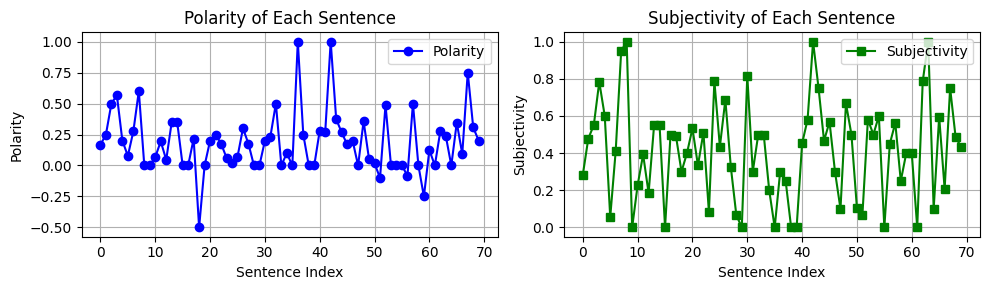

In [ ]:
import matplotlib.pyplot as plt

# Lists to store polarity and subjectivity for each sentence
polarity_values = []
subjectivity_values = []

# Analyze sentiment for each sentence
for sentence in blob_titanic.sentences:
    sentiment = sentence.sentiment
    polarity_values.append(sentiment.polarity)
    subjectivity_values.append(sentiment.subjectivity)

# Plotting the graph... figsize=(width,height)
plt.figure(figsize=(10, 3))

# Plot polarity..subplot(num_rows, num_cols, index)
plt.subplot(1, 2, 1)
plt.plot(polarity_values, marker='o', color='b', label='Polarity')
plt.title('Polarity of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Polarity')
plt.grid(True)
plt.legend()

# Plot subjectivity
plt.subplot(1, 2, 2)
plt.plot(subjectivity_values, marker='s', color='g', label='Subjectivity')
plt.title('Subjectivity of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

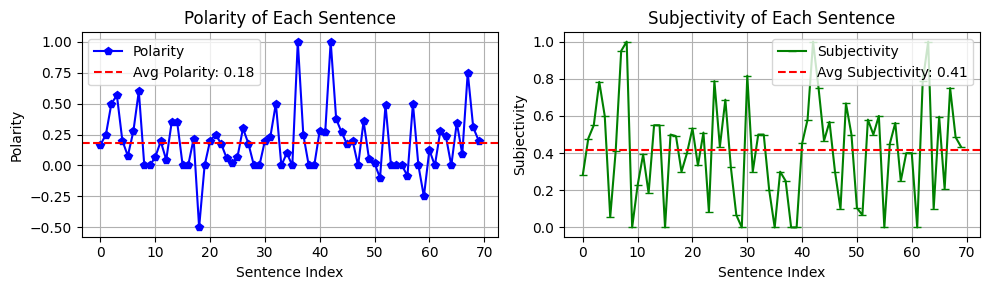

In [ ]:
import matplotlib.pyplot as plt

# Lists to store polarity and subjectivity for each sentence
polarity_values = []
subjectivity_values = []

# Analyze sentiment for each sentence
for sentence in blob_titanic.sentences:
    sentiment = sentence.sentiment
    polarity_values.append(sentiment.polarity)
    subjectivity_values.append(sentiment.subjectivity)

# Calculate average polarity and subjectivity
average_polarity = sum(polarity_values) / len(polarity_values) if polarity_values else 0
average_subjectivity = sum(subjectivity_values) / len(subjectivity_values) if subjectivity_values else 0

# Plotting the graph
plt.figure(figsize=(10, 3))

# Plot polarity
plt.subplot(1, 2, 1)
plt.plot(polarity_values, marker='p', color='b', label='Polarity')
plt.axhline(y=average_polarity, color='r', linestyle='--', label=f'Avg Polarity: {average_polarity:.2f}')
plt.title('Polarity of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Polarity')
plt.grid(True)
plt.legend()

# Plot subjectivity
plt.subplot(1, 2, 2)
plt.plot(subjectivity_values, marker='_', color='g', label='Subjectivity')
plt.axhline(y=average_subjectivity, color='r', linestyle='--', label=f'Avg Subjectivity: {average_subjectivity:.2f}')
plt.title('Subjectivity of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**marker**
- 'o': วงกลม
- 's': สี่เหลี่ยม
- '^': รูปสามเหลี่ยมชี้ขึ้น
- 'v': รูปสามเหลี่ยมชี้ลง
- '>': รูปสามเหลี่ยมชี้ขวา
- '<': รูปสามเหลี่ยมชี้ซ้าย
- 'D': รูปสี่เหลี่ยมขนมเปียกปูน
- 'p': รูปห้าเหลี่ยม
- 'h': รูปหกเหลี่ยม (หัว)
- 'H': รูปหกเหลี่ยม (ตัวใหญ่)
- '+': เครื่องหมายบวก
- 'x': เครื่องหมายกากบาท
- '|': เครื่องหมายแนวตั้ง
- '_': เครื่องหมายแนวนอน

**linestyle**
- '-': เส้นตรง (solid line)
- '--': เส้นประ (dashed line)
- '-.': เส้นประ-จุด (dash-dot line)
- ':': เส้นจุด (dotted line)